In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [2]:
# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# reading the training data
house_train = pd.read_csv("train.csv")

In [4]:
house_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
house_train.shape


(1460, 81)

In [6]:
#Statistical Summary of training set
house_train.describe()     

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
#Summary of Each Column
house_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
# Extarcting numeric columns in the training set
train_numeric = house_train.select_dtypes(include=['float64', 'int64'])
train_numeric.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [9]:
#Among the Numeric Columns,few of them are having discrete values which wont make impact on the SalesPrice. So removing those columns
train_numeric = train_numeric.drop(['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'MoSold', 'YrSold'], axis=1)
train_numeric.head()


,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,1,65.0,8450,196.0,706,0,150,856,856,854,...,1710,548,0,61,0,0,0,0,0,208500
1,2,80.0,9600,0.0,978,0,284,1262,1262,0,...,1262,460,298,0,0,0,0,0,0,181500
2,3,68.0,11250,162.0,486,0,434,920,920,866,...,1786,608,0,42,0,0,0,0,0,223500
3,4,60.0,9550,0.0,216,0,540,756,961,756,...,1717,642,0,35,272,0,0,0,0,140000
4,5,84.0,14260,350.0,655,0,490,1145,1145,1053,...,2198,836,192,84,0,0,0,0,0,250000


In [10]:
train_numeric.shape

(1460, 21)

In [11]:
# Checking outliers at 25%,50%,75%,90%,95% and above
train_numeric.describe(percentiles=[.25, .5, .75, .90, .95, .99])


,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
count,1460.000000,1201.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,70.049958,10516.828082,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,...,1515.463699,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890
std,421.610009,24.284752,9981.264932,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,...,525.480383,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883
min,1.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,...,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,365.750000,59.000000,7553.500000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,...,1129.500000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000
50%,730.500000,69.000000,9478.500000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,...,1464.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000
75%,1095.250000,80.000000,11601.500000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,...,1776.750000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000
90%,1314.100000,96.000000,14381.700000,335.000000,1065.500000,117.200000,1232.000000,1602.200000,1680.000000,954.200000,...,2158.300000,757.100000,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,278000.000000
95%,1387.050000,107.000000,17401.150000,456.000000,1274.000000,396.200000,1468.000000,1753.000000,1831.250000,1141.050000,...,2466.100000,850.100000,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,326100.000000
99%,1445.410000,141.000000,37567.640000,791.920000,1572.410000,830.380000,1797.050000,2155.050000,2219.460000,1418.920000,...,3123.480000,1002.790000,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,442567.010000


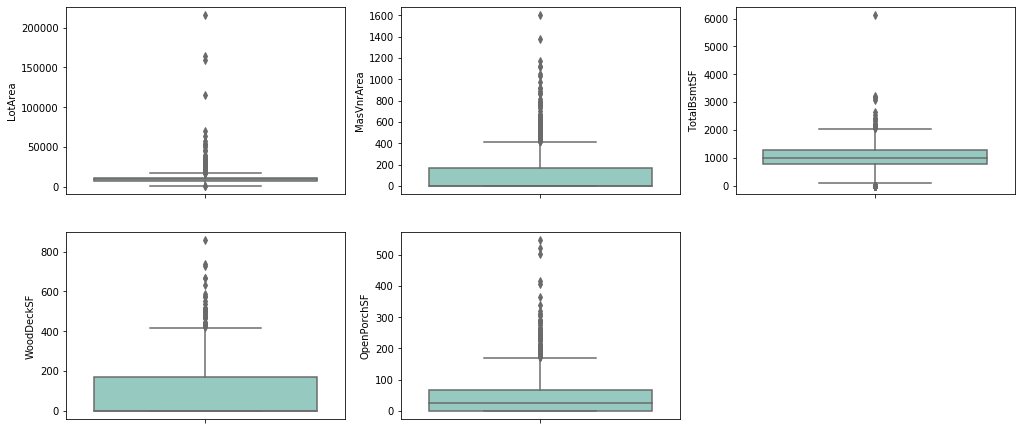

In [12]:
# Check the outliers in all the numeric columns

plt.figure(figsize=(17, 20))
plt.subplot(5,3,1)
sns.boxplot(y = 'LotArea', palette='Set3', data = train_numeric)
plt.subplot(5,3,2)
sns.boxplot(y = 'MasVnrArea', palette='Set3', data = train_numeric)
plt.subplot(5,3,3)
sns.boxplot(y = 'TotalBsmtSF', palette='Set3', data = train_numeric)
plt.subplot(5,3,4)
sns.boxplot(y = 'WoodDeckSF', palette='Set3', data = train_numeric)
plt.subplot(5,3,5)
sns.boxplot(y = 'OpenPorchSF', palette='Set3', data = train_numeric)
plt.show()

In [13]:
# Removing Outliers

# Removing values beyond 98% for LotArea

nn_quartile_LotArea = train_numeric['LotArea'].quantile(0.98)
train_numeric = train_numeric[train_numeric["LotArea"] < nn_quartile_LotArea]

# Removing values beyond 98% for MasVnrArea

nn_quartile_MasVnrArea = train_numeric['MasVnrArea'].quantile(0.98)
train_numeric = train_numeric[train_numeric["MasVnrArea"] < nn_quartile_MasVnrArea]

# Removing values beyond 99% for TotalBsmtSF

nn_quartile_TotalBsmtSF = train_numeric['TotalBsmtSF'].quantile(0.99)
train_numeric = train_numeric[train_numeric["TotalBsmtSF"] < nn_quartile_TotalBsmtSF]

# Removing values beyond 99% for WoodDeckSF

nn_quartile_WoodDeckSF = train_numeric['WoodDeckSF'].quantile(0.99)
train_numeric = train_numeric[train_numeric["WoodDeckSF"] < nn_quartile_WoodDeckSF]

# Removing values beyond 99% for OpenPorchSF

nn_quartile_OpenPorchSF = train_numeric['OpenPorchSF'].quantile(0.99)
train_numeric = train_numeric[train_numeric["OpenPorchSF"] < nn_quartile_OpenPorchSF]


In [14]:
#Checking Corelation between the values
cor = train_numeric.corr()
cor

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
Id,1.000000,-0.024214,-0.007564,-0.038445,-0.014446,0.005539,-0.007878,-0.022327,-0.001077,-0.004426,...,-0.008891,0.011638,-0.037717,-0.042326,0.014760,-0.047855,-0.009552,0.041450,-0.006981,-0.024541
LotFrontage,-0.024214,1.000000,0.653127,0.179528,0.121210,0.031684,0.151046,0.312873,0.379635,0.064353,...,0.337943,0.324693,0.088498,0.149347,-0.002137,0.089465,0.059412,0.022255,0.014754,0.363180
LotArea,-0.007564,0.653127,1.000000,0.095889,0.144879,0.066552,0.090778,0.287499,0.391655,0.118705,...,0.395271,0.297677,0.136589,0.134955,-0.000641,0.094574,0.100366,0.033301,0.063300,0.378297
MasVnrArea,-0.038445,0.179528,0.095889,1.000000,0.215363,-0.056336,0.086770,0.308845,0.300034,0.108120,...,0.308045,0.339933,0.123310,0.167495,-0.109149,0.043805,0.072838,0.002570,-0.028186,0.409252
BsmtFinSF1,-0.014446,0.121210,0.144879,0.215363,1.000000,-0.059107,-0.557061,0.428386,0.349751,-0.195786,...,0.070962,0.229774,0.196293,0.061874,-0.120258,0.038982,0.069234,0.027378,0.008733,0.354587
BsmtFinSF2,0.005539,0.031684,0.066552,-0.056336,-0.059107,1.000000,-0.223886,0.093314,0.091402,-0.088189,...,-0.011288,-0.012059,0.087667,-0.004672,0.043699,-0.030563,0.040270,0.071103,0.005804,-0.023242
BsmtUnfSF,-0.007878,0.151046,0.090778,0.086770,-0.557061,-0.223886,1.000000,0.438089,0.311896,-0.002980,...,0.229013,0.176220,-0.039189,0.139369,0.000882,0.024852,-0.012228,-0.035982,-0.025240,0.204307
TotalBsmtSF,-0.022327,0.312873,0.287499,0.308845,0.428386,0.093314,0.438089,1.000000,0.770771,-0.252018,...,0.332117,0.444164,0.204517,0.223290,-0.111457,0.057899,0.077789,0.018129,-0.016773,0.606801
1stFlrSF,-0.001077,0.379635,0.391655,0.300034,0.349751,0.091402,0.311896,0.770771,1.000000,-0.276350,...,0.480075,0.448144,0.190481,0.182363,-0.077240,0.078675,0.083067,0.019734,-0.019314,0.585418
2ndFlrSF,-0.004426,0.064353,0.118705,0.108120,-0.195786,-0.088189,-0.002980,-0.252018,-0.276350,1.000000,...,0.704267,0.122303,0.047244,0.222622,0.065694,-0.022707,0.032980,0.008950,0.016534,0.301730


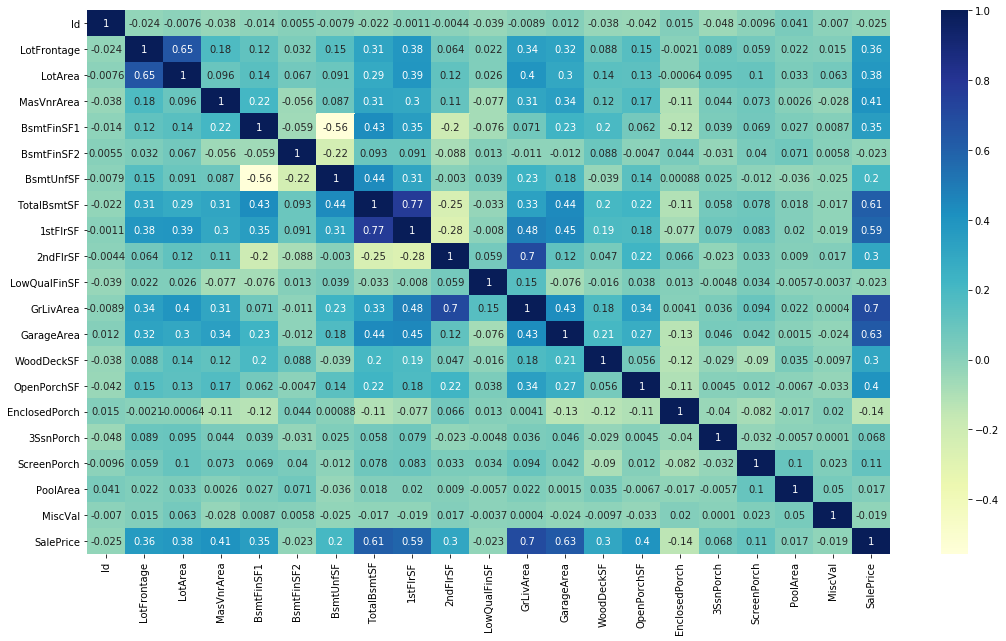

In [15]:
plt.figure(figsize=(18,10))

# heatmap
sns.heatmap(cor, annot=True,cmap="YlGnBu")
plt.show()


In [16]:
# Data CLeaning
house_train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [17]:
round(100*(house_train.isnull().sum()/len(house_train.index)), 2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
                 ...  
MoSold            0.00
YrSold            0.00
SaleType          0.00
SaleCondition     0.00
SalePrice         0.00
Length: 81, dtype: float64

In [18]:
house_train.select_dtypes(include='object').isnull().sum()[house_train.select_dtypes(include='object').isnull().sum()>0]

Alley           1369
MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [19]:
# Replace NA with None in the following columns below : 

for col in ('Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 
            'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'Electrical'):
    
    house_train[col]=house_train[col].fillna('None')

In [20]:
#Removing categorical attributes that have more than 85% data associated to one value since that column would be skewed to one value
#85% of 1450 is 1241
def getHighCategoricalColumnsValueCounts():
    column = []
    categorical_columns = house_train.select_dtypes(include=['object'])
    for col in (categorical_columns):
        if(house_train[col].value_counts().max() >= 1241):
            column.append(col)
    return column

columns_getting_removed = getHighCategoricalColumnsValueCounts()

# Remove the columns with skewed data

house_train.drop(columns_getting_removed, axis = 1, inplace = True)

house_train.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,0,0,0,None,0,2,2008,Normal,208500
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,0,0,0,None,0,5,2007,Normal,181500
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,0,0,0,None,0,9,2008,Normal,223500
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,272,0,0,0,None,0,2,2006,Abnorml,140000
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,0,0,0,None,0,12,2008,Normal,250000


In [21]:
house_train.isnull().sum()[house_train.isnull().sum()>0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [22]:
#handling numeric columns with missing values
house_train['LotFrontage'] = house_train['LotFrontage'].replace(np.nan, house_train['LotFrontage'].median())
house_train['MasVnrArea'] = house_train['MasVnrArea'].replace(np.nan, house_train['MasVnrArea'].median())
house_train['GarageYrBlt']=house_train['GarageYrBlt'].fillna(0)
house_train['GarageYrBlt'] = house_train['GarageYrBlt'].astype(int)


In [23]:
# Create a new column  IsRemodelled so that it helps to determine whether the house has been remodelled or not
def checkRemodel(record):
    if(record['YearBuilt'] == record['YearRemodAdd']):
        return 0
    elif(record['YearBuilt'] < record['YearRemodAdd']):
        return 1
    else:
        return 2
    
house_train['IsRemodelled'] = house_train.apply(checkRemodel, axis=1)
house_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,IsRemodelled
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,0,0,None,0,2,2008,Normal,208500,0
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,0,0,None,0,5,2007,Normal,181500,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,0,0,None,0,9,2008,Normal,223500,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,0,0,0,None,0,2,2006,Abnorml,140000,1
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,0,0,None,0,12,2008,Normal,250000,0


In [24]:
# Create a new column named BuiltOrRemodelledAge and determine the age of the building at the time of selling

def getBuiltOrRemodelAge(record):
    if(record['YearBuilt'] == record['YearRemodAdd']):
        return record['YrSold'] - record['YearBuilt']
    else:
        return record['YrSold'] - record['YearRemodAdd']
       
house_train['BuiltOrRemodelAge'] = house_train.apply(getBuiltOrRemodelAge, axis=1)
house_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,IsRemodelled,BuiltOrRemodelAge
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,0,None,0,2,2008,Normal,208500,0,5
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,0,None,0,5,2007,Normal,181500,0,31
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,0,None,0,9,2008,Normal,223500,1,6
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,0,0,None,0,2,2006,Abnorml,140000,1,36
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,0,None,0,12,2008,Normal,250000,0,8


In [25]:
# Create a new column which would indicate if the Garage is old or new.
def getGaragestatus(row):
    if row == 0:
        return 0
    elif row >= 1900 and row < 2000:        
        return 0
    else:   
        return 1
    
house_train['OldOrNewGarage'] = house_train['GarageYrBlt'].apply(getGaragestatus)
house_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,None,0,2,2008,Normal,208500,0,5,1
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,None,0,5,2007,Normal,181500,0,31,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,None,0,9,2008,Normal,223500,1,6,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,0,None,0,2,2006,Abnorml,140000,1,36,0
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,None,0,12,2008,Normal,250000,0,8,1


In [26]:
#Since desired columns got created, remove unnecessary columns
house_train.drop(['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt'], axis = 1, inplace = True)

In [27]:
#% of data retained
data_retained = round(100*(len(house_train)/1460),2)
print(data_retained)


100.0


**Data Preparation**

In [28]:
house_train['d_LotShape'] = house_train['LotShape'].map({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0})
house_train['d_ExterQual'] = house_train['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0 })
house_train['d_BsmtQual'] = house_train['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
house_train['d_BsmtExposure'] = house_train['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0})
house_train['d_BsmtFinType1'] = house_train['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 
                                                                 'None': 0})
house_train['d_HeatingQC'] = house_train['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
house_train['d_KitchenQual'] = house_train['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
house_train['d_FireplaceQu'] = house_train['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
house_train['d_GarageFinish'] = house_train['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0 })
house_train['d_BldgType'] = house_train['BldgType'].map({'Twnhs': 5, 'TwnhsE': 4, 'Duplex': 3, '2fmCon': 2, '1Fam': 1, 
                                                                 'None': 0 })
house_train['d_HouseStyle'] = house_train['HouseStyle'].map({'SLvl': 8, 'SFoyer': 7, '2.5Fin': 6, '2.5Unf': 5, '2Story': 4, 
                                                                 '1.5Fin': 3, '1.5Unf': 2, '1Story': 1, 'None': 0 })
house_train['d_Fence'] = house_train['Fence'].map({'GdPrv': 4, 'GdWo': 3, 'MnPrv': 2, 'MnWw': 1, 'None': 0 })
house_train['d_LotConfig'] = house_train['LotConfig'].map({'Inside': 5, 'Corner': 4, 'CulDSac': 3, 'FR2': 2, 'FR3': 1, 
                                                           'None': 0  })
house_train['d_MasVnrType'] = house_train['MasVnrType'].map({'BrkCmn': 1, 'BrkFace': 1, 'CBlock': 1, 'Stone': 1, 'None': 0 })
house_train['d_SaleCondition'] = house_train['SaleCondition'].map({'Normal': 1, 'Partial': 1, 'Abnorml': 0, 'Family': 0, 
                                                                   'Alloca': 0, 'AdjLand': 0, 'None': 0})
house_train.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,d_HeatingQC,d_KitchenQual,d_FireplaceQu,d_GarageFinish,d_BldgType,d_HouseStyle,d_Fence,d_LotConfig,d_MasVnrType,d_SaleCondition
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,5,4,0,2,1,4,0,5,1,1
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,5,3,3,2,1,1,0,2,0,1
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,5,4,3,2,1,4,0,5,1,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,4,4,4,1,1,4,0,4,0,0
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,5,4,3,2,1,4,0,2,1,1


In [29]:
#Since desired columns got created, remove unnecessary columns
house_train = house_train.drop(['Id', 'LotShape', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 
                                'KitchenQual', 'FireplaceQu', 'GarageFinish', 'BldgType', 'HouseStyle', 'Fence', 
                                'LotConfig', 'MasVnrType', 'SaleCondition'], axis=1)
house_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,...,d_HeatingQC,d_KitchenQual,d_FireplaceQu,d_GarageFinish,d_BldgType,d_HouseStyle,d_Fence,d_LotConfig,d_MasVnrType,d_SaleCondition
0,60,RL,65.0,8450,CollgCr,7,5,Gable,VinylSd,VinylSd,...,5,4,0,2,1,4,0,5,1,1
1,20,RL,80.0,9600,Veenker,6,8,Gable,MetalSd,MetalSd,...,5,3,3,2,1,1,0,2,0,1
2,60,RL,68.0,11250,CollgCr,7,5,Gable,VinylSd,VinylSd,...,5,4,3,2,1,4,0,5,1,1
3,70,RL,60.0,9550,Crawfor,7,5,Gable,Wd Sdng,Wd Shng,...,4,4,4,1,1,4,0,4,0,0
4,60,RL,84.0,14260,NoRidge,8,5,Gable,VinylSd,VinylSd,...,5,4,3,2,1,4,0,2,1,1


In [30]:
# For the following columns create dummies

# Creating dummies for Foundation

d_Foundation = pd.get_dummies(house_train['Foundation'], prefix='Foundation', drop_first = True)
house_train = pd.concat([house_train, d_Foundation], axis = 1)

# Creating dummies for GarageType

d_GarageType = pd.get_dummies(house_train['GarageType'], prefix='GarageType', drop_first = True)
house_train = pd.concat([house_train, d_GarageType], axis = 1)

# Creating dummies for MSZoning

d_MSZoning = pd.get_dummies(house_train['MSZoning'], prefix='MSZoning', drop_first = True)
house_train = pd.concat([house_train, d_MSZoning], axis = 1)


# Creating dummies for Exterior2nd

d_Exterior2nd = pd.get_dummies(house_train['Exterior2nd'], prefix='Exterior2nd', drop_first = True)
house_train = pd.concat([house_train, d_Exterior2nd], axis = 1)


# Creating dummies for Neighborhood

d_Neighborhood = pd.get_dummies(house_train['Neighborhood'], prefix='Neighborhood', drop_first = True)
house_train = pd.concat([house_train, d_Neighborhood], axis = 1)

# Creating dummies for RoofStyle

d_RoofStyle = pd.get_dummies(house_train['RoofStyle'], prefix='RoofStyle', drop_first = True)
house_train = pd.concat([house_train, d_RoofStyle], axis = 1)

# Creating dummies for Exterior1st

d_Exterior1st = pd.get_dummies(house_train['Exterior1st'], prefix='Exterior1st', drop_first = True)
house_train = pd.concat([house_train, d_Exterior1st], axis = 1)


house_train.head()


,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,...,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,60,RL,65.0,8450,CollgCr,7,5,Gable,VinylSd,VinylSd,...,0,0,0,0,0,0,0,1,0,0
1,20,RL,80.0,9600,Veenker,6,8,Gable,MetalSd,MetalSd,...,0,0,0,1,0,0,0,0,0,0
2,60,RL,68.0,11250,CollgCr,7,5,Gable,VinylSd,VinylSd,...,0,0,0,0,0,0,0,1,0,0
3,70,RL,60.0,9550,Crawfor,7,5,Gable,Wd Sdng,Wd Shng,...,0,0,0,0,0,0,0,0,1,0
4,60,RL,84.0,14260,NoRidge,8,5,Gable,VinylSd,VinylSd,...,0,0,0,0,0,0,0,1,0,0


In [31]:
house_train = house_train.drop(['MSZoning', 'Neighborhood', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'Foundation', 
                                'GarageType'], axis=1)

house_train.head()


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,60,65.0,8450,7,5,196.0,706,0,150,856,...,0,0,0,0,0,0,0,1,0,0
1,20,80.0,9600,6,8,0.0,978,0,284,1262,...,0,0,0,1,0,0,0,0,0,0
2,60,68.0,11250,7,5,162.0,486,0,434,920,...,0,0,0,0,0,0,0,1,0,0
3,70,60.0,9550,7,5,0.0,216,0,540,756,...,0,0,0,0,0,0,0,0,1,0
4,60,84.0,14260,8,5,350.0,655,0,490,1145,...,0,0,0,0,0,0,0,1,0,0


**Train Test Split**

In [32]:
df_X = house_train.drop(['SalePrice'], axis=1)
df_X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,60,65.0,8450,7,5,196.0,706,0,150,856,...,0,0,0,0,0,0,0,1,0,0
1,20,80.0,9600,6,8,0.0,978,0,284,1262,...,0,0,0,1,0,0,0,0,0,0
2,60,68.0,11250,7,5,162.0,486,0,434,920,...,0,0,0,0,0,0,0,1,0,0
3,70,60.0,9550,7,5,0.0,216,0,540,756,...,0,0,0,0,0,0,0,0,1,0
4,60,84.0,14260,8,5,350.0,655,0,490,1145,...,0,0,0,0,0,0,0,1,0,0


In [33]:
df_y = house_train['SalePrice']
df_y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [34]:
from sklearn.preprocessing import scale
from sklearn.model_selection  import train_test_split

cols = df_X.columns
df_X = pd.DataFrame(scale(df_X))
df_X.columns = cols

np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, train_size=0.7, test_size = 0.3, random_state=100)

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV


In [36]:
# list of alphas to tune
params = {'alpha': [0,0.0001, 0.0005, 0.001, 0.003, 0.005,10,20]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.4s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0, 0.0001, 0.0005, 0.001, 0.003, 0.005, 10,
                                   20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [37]:
cv_results = pd.DataFrame(model_cv.cv_results_)
#cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.022272,0.012871,0.000000,0.000000,0,{'alpha': 0},-5.965807e+16,-9.796315e+17,-1.244364e+18,-7.207341e+17,...,-6.632854e+17,4.309912e+17,8,-19156.492647,-15834.485924,-18312.396573,-19344.598531,-18669.943696,-18263.583474,1267.588782
1,0.003126,0.006252,0.003126,0.006252,0.0001,{'alpha': 0.0001},-2.191723e+04,-2.287649e+04,-2.175896e+04,-1.970420e+04,...,-2.144474e+04,1.061114e+03,7,-18493.567141,-15253.222696,-17599.427118,-18735.804832,-18069.004558,-17630.205269,1249.902586
2,0.008363,0.005026,0.000000,0.000000,0.0005,{'alpha': 0.0005},-2.191722e+04,-2.287642e+04,-2.175895e+04,-1.970417e+04,...,-2.144469e+04,1.061112e+03,6,-18493.531354,-15253.209642,-17599.404686,-18735.796514,-18068.987080,-17630.185855,1249.900019
3,0.006402,0.003201,0.001601,0.003201,0.001,{'alpha': 0.001},-2.191721e+04,-2.287634e+04,-2.175894e+04,-1.970413e+04,...,-2.144464e+04,1.061110e+03,5,-18493.486644,-15253.193335,-17599.376658,-18735.786118,-18068.965242,-17630.161600,1249.896811
4,0.003352,0.004112,0.001601,0.003201,0.003,{'alpha': 0.003},-2.191715e+04,-2.287600e+04,-2.175888e+04,-1.970399e+04,...,-2.144442e+04,1.061102e+03,4,-18493.308064,-15253.128223,-17599.264691,-18735.744542,-18068.878005,-17630.064705,1249.883978


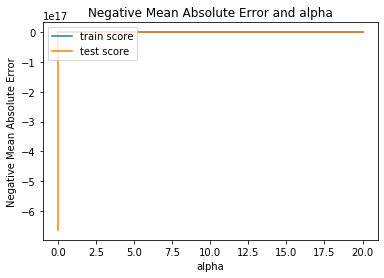

In [38]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()


In [39]:
model_cv.best_params_

{'alpha': 20}

In [40]:
alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)


Ridge(alpha=20, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [41]:
from sklearn.metrics import r2_score


In [42]:
y_train_pred=ridge.predict(X_train)
r2_score(y_train,y_train_pred)

0.8691000280323082

In [43]:
alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_test, y_test)

y_test_pred=ridge.predict(X_test)
r2_score(y_test,y_test_pred)

0.9227387645502118

**validating the other values of alpha**

In [44]:
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

y_train_pred=ridge.predict(X_train)
r2_score(y_train,y_train_pred)

0.869479744056094

In [45]:
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_test, y_test)

y_test_pred=ridge.predict(X_test)
r2_score(y_test,y_test_pred)

0.923759301262424

In [46]:
alpha = 0.05
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

y_train_pred=ridge.predict(X_train)
r2_score(y_train,y_train_pred)

0.8699568591529322

In [47]:
alpha = 0.05
ridge = Ridge(alpha=alpha)

ridge.fit(X_test, y_test)

y_test_pred=ridge.predict(X_test)
r2_score(y_test,y_test_pred)

0.9251604176707658

In [48]:
alpha = 0.03
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

y_train_pred=ridge.predict(X_train)
r2_score(y_train,y_train_pred)

0.8699570249542009

In [49]:
alpha = 0.03
ridge = Ridge(alpha=alpha)

ridge.fit(X_test, y_test)

y_test_pred=ridge.predict(X_test)
r2_score(y_test,y_test_pred)

0.9251619420900336

In [50]:
alpha = 0.01
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

y_train_pred=ridge.predict(X_train)
r2_score(y_train,y_train_pred)



0.8699571103344964

In [51]:
alpha = 0.01
ridge = Ridge(alpha=alpha)

ridge.fit(X_test, y_test)

y_test_pred=ridge.predict(X_test)
r2_score(y_test,y_test_pred)

0.9251627796169023

In [52]:
alpha = 0.0003
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

y_train_pred=ridge.predict(X_train)
r2_score(y_train,y_train_pred)



0.8699571212483338

In [53]:
alpha = 0.0003
ridge = Ridge(alpha=alpha)

ridge.fit(X_test, y_test)

y_test_pred=ridge.predict(X_test)
r2_score(y_test,y_test_pred)

0.9251628924989528

In [54]:
alpha = 0.0005
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

y_train_pred=ridge.predict(X_train)
r2_score(y_train,y_train_pred)

0.869957121230684

In [55]:
alpha = 0.0005
ridge = Ridge(alpha=alpha)
ridge.fit(X_test, y_test)

y_test_pred=ridge.predict(X_test)
r2_score(y_test,y_test_pred)

0.9251628923121619

In [56]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    6.4s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0, 0.0001, 0.0005, 0.001, 0.003, 0.005, 10,
                                   20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [57]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.113602,0.007767,0.000000,0.000000,0,{'alpha': 0},-2.099701e+06,-1.331959e+06,-471930.728860,-19700.370624,...,-788830.208290,811805.134478,8,-18489.861919,-15251.652090,-17597.899825,-18735.461374,-18068.038506,-17628.582743,1249.867534
1,0.105154,0.023692,0.000000,0.000000,0.0001,{'alpha': 0.0001},-2.191747e+04,-2.287041e+04,-21761.559148,-19700.370250,...,-21421.814097,1071.390626,3,-18489.861038,-15251.651610,-17597.899217,-18735.461080,-18068.037964,-17628.582182,1249.867508
2,0.115641,0.037744,0.003127,0.006254,0.0005,{'alpha': 0.0005},-2.191747e+04,-2.287041e+04,-21761.558086,-19700.368755,...,-21421.840702,1071.373372,4,-18489.857513,-15251.649690,-17597.896785,-18735.459928,-18068.035793,-17628.579942,1249.867408
3,0.100030,0.012505,0.000000,0.000000,0.001,{'alpha': 0.001},-2.191747e+04,-2.287040e+04,-21761.556759,-19700.366885,...,-21421.873958,1071.351809,5,-18489.853108,-15251.647289,-17597.893746,-18735.458507,-18068.033163,-17628.577163,1249.867292
4,0.266276,0.184915,0.000000,0.000000,0.003,{'alpha': 0.003},-2.191745e+04,-2.287036e+04,-21761.551450,-19700.359408,...,-21422.006984,1071.265602,6,-18489.835487,-15251.637770,-17597.881589,-18735.452963,-18068.022658,-17628.566094,1249.866823


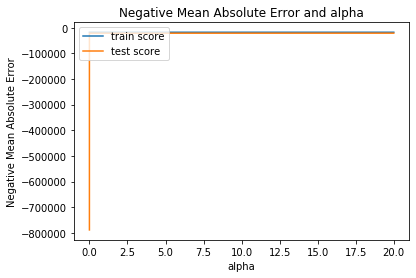

In [58]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()


In [59]:
model_cv.best_params_

{'alpha': 20}

In [60]:
alpha =20

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=20, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [61]:
y_train_pred=lasso.predict(X_train)
r2_score(y_train,y_train_pred)


0.8696583498318197

In [62]:
alpha =20

lasso = Lasso(alpha=alpha)

lasso.fit(X_test, y_test)

y_test_pred=lasso.predict(X_test)
r2_score(y_test,y_test_pred)

0.924804791516298

In [63]:
alpha =0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
y_train_pred=lasso.predict(X_train)
r2_score(y_train,y_train_pred)

0.8699568734613272

In [64]:
alpha =0.0001

lasso = Lasso(alpha=alpha)

lasso.fit(X_test, y_test)

y_test_pred=lasso.predict(X_test)
r2_score(y_test,y_test_pred)

0.9251605639205632

In [65]:
alpha =0.0003

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
y_train_pred=lasso.predict(X_train)
r2_score(y_train,y_train_pred)

0.8699568732057275

In [66]:
alpha =0.0003

lasso = Lasso(alpha=alpha)

lasso.fit(X_test, y_test)

y_test_pred=lasso.predict(X_test)
r2_score(y_test,y_test_pred)

0.9251605631620672

In [67]:
#Most important variables for prediction
model_parameters = list(lasso.coef_)
model_parameters.insert(0,lasso.intercept_)
columns = X_train.columns
columns.insert(0,'constant')
lasso_coef = pd.DataFrame(list(zip(cols,model_parameters)))
lasso_coef.columns = ['Feature','Coeficient']
lasso_coef.sort_values(by='Coeficient',ascending=False).head(10)

,Feature,Coeficient
0,MSSubClass,182054.358343
121,Exterior1st_Wd Sdng,15369.740740
4,OverallCond,14557.087538
7,BsmtFinSF2,13622.144458
64,MSZoning_RM,13487.196916
58,GarageType_CarPort,13148.463181
56,GarageType_Basment,12347.283223
60,GarageType_None,11816.786453
62,MSZoning_RH,11789.879351
11,2ndFlrSF,10668.960152


**we see that with both lasso and Ridge regression we are able to get test and train score. We can use either for the final model and would be going ahead with the Lasso model and the most important variables have been defined above.**